In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv(r"G:\机器学习资料\菜菜的skleran\05逻辑回归与评分卡\rankingcard.csv",index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [4]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data = data.reset_index(drop=True)

In [7]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [10]:
def fill_missing_rf(X,y,to_fill):
    """
   使用随机森林填补一个特征的缺失值的函数
   参数：
   X：要填补的特征矩阵
   y：完整的，没有缺失值的标签
   to_fill：字符串，要填补的那一列的名称
   """
    
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [11]:
y = data.iloc[:,0]
x = data.iloc[:,1:]
x.shape
#=====【TIME WARNING：1 min】=====#
y_pred = fill_missing_rf(x,y,"MonthlyIncome")

In [12]:
y_pred.shape

(29221,)

In [13]:
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [14]:
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5425.958532,13242.115364,0.0,0.0,0.170000,1800.000000,4420.230000,7416.000000,10800.000000,23205.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [15]:
data = data[data['age']!=0]

In [16]:
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]

In [17]:
data = data.reset_index(drop=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [19]:
from  imblearn.over_sampling import SMOTE
X = data.iloc[:,1:]
y = data.iloc[:,0]


In [20]:
data.shape

(149165, 11)

In [21]:
y.value_counts()
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149165; 1占6.62%; 0占93.38%


In [22]:
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(X,y)
n_sample_ = X.shape[0]
pd.Series(y).value_counts()
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：278584; 1占50.00%; 0占50.00%


In [23]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
model_data.to_csv(r"G:\机器学习资料\菜菜的skleran\ranking_card\model_data.csv")
vali_data.to_csv(r"G:\机器学习资料\菜菜的skleran\ranking_card\vali_data.csv")


In [24]:
vali_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000000,58,0,0.000481,2080.000000,4,0,0,0,0.000000
1,1,0.588870,44,0,0.198193,29373.217358,13,0,2,0,2.504880
2,0,0.057460,64,0,0.021830,6000.000000,4,0,0,0,0.000000
3,0,0.011585,52,0,0.139685,5583.000000,8,0,1,0,0.000000
4,1,0.663034,53,0,0.399663,4800.000000,12,0,0,0,0.201706


In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from  imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [24]:
model_data = pd.read_csv(r"G:\机器学习资料\菜菜的skleran\ranking_card\model_data.csv",index_col=0)
vali_data = pd.read_csv(r"G:\机器学习资料\菜菜的skleran\ranking_card\vali_data.csv",index_col=0)

In [27]:
#等频分箱
model_data['qcut'],updown = pd.qcut(model_data['age'],retbins=True,q=20)
model_data.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [30]:
# count_y0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs']
# count_y1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
count_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [31]:
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]
num_bins

[(21.0, 28.0, 4243, 7488),
 (28.0, 31.0, 3571, 5913),
 (31.0, 34.0, 4075, 6736),
 (34.0, 36.0, 2908, 4607),
 (36.0, 39.0, 5182, 7504),
 (39.0, 41.0, 3956, 5855),
 (41.0, 43.0, 4002, 5754),
 (43.0, 45.0, 4389, 5955),
 (45.0, 46.0, 2419, 3284),
 (46.0, 48.0, 4813, 6154),
 (48.0, 50.0, 4900, 6215),
 (50.0, 52.0, 4728, 5820),
 (52.0, 54.0, 4681, 5072),
 (54.0, 56.0, 4677, 3999),
 (56.0, 58.0, 4483, 3423),
 (58.0, 61.0, 6583, 4787),
 (61.0, 64.0, 6968, 3191),
 (64.0, 68.0, 6623, 2279),
 (68.0, 74.0, 6753, 1921),
 (74.0, 107.0, 7737, 1360)]

In [32]:
import copy
num_copy = copy.deepcopy(num_bins)



In [33]:
num_copy=[list(i) for i in num_copy]
num_copy[0][2]=0
num_copy[15][3]=0
num_copy
num_copy1 = copy.deepcopy(num_copy)

In [34]:
# def merge_diff(num_copy):
#     for i in range(20):
#         if  0 in num_copy[0][2:]:
#             num_copy[0:2] = [[num_copy[0][0],
#                         num_copy[1][1],
#                         num_copy[0][2]+num_copy[1][2],
#                         num_copy[0][3]+num_copy[1][3],]]
#             continue
#         for i in range(1,len(num_copy)):
#             if 0 in num_copy[i][2:]:
#                 num_copy[i-1:i+1]=[[
#                         num_copy[i-1][0],
#                         num_copy[i][1],
#                         num_copy[i-1][2]+num_copy[i][2],
#                         num_copy[i-1][3]+num_copy[i][3],]]
#                 break
#         else:
#             break
#     return num_copy
# merge_diff(num_copy)


In [35]:
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv


In [37]:
columns = ["min","max","count_0","count_1"]
df = pd.DataFrame(num_bins,columns=columns)
df["total"] = df.count_0 + df.count_1
df["percentage"] = df.total / df.total.sum()
df["bad_rate"] = df.count_1 / df.total
df["good%"] = df.count_0/df.count_0.sum()
df["bad%"] = df.count_1/df.count_1.sum()
df["woe"] = np.log(df["good%"] / df["bad%"])
df.head()

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7488,11731,0.060157,0.638309,0.043433,0.076944,-0.571867
1,28.0,31.0,3571,5913,9484,0.048634,0.623471,0.036554,0.060760,-0.508143
2,31.0,34.0,4075,6736,10811,0.055439,0.623069,0.041713,0.069217,-0.506431
3,34.0,36.0,2908,4607,7515,0.038537,0.613041,0.029767,0.047340,-0.463947
4,36.0,39.0,5182,7504,12686,0.065054,0.591518,0.053045,0.077109,-0.374081


In [38]:
import matplotlib.pyplot as plt
import scipy
num_bins_ = num_bins.copy()

In [39]:
len(num_bins_)

20

In [40]:
def get_and_plt_chi2(num_bins_,N):
    iv , axisx = [],[]
    while len(num_bins_) > N:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency(x1,x2)[1]
            pvs.append(pv)
        index = pvs.index(max(pvs))
        num_bins_[index:index+2]=[(num_bins_[index][0],
                                   num_bins_[index+1][1],
                                   num_bins_[index][2]+num_bins_[index+1][2],
                                   num_bins_[index][3]+num_bins_[index+1][3],)]
        
        bins_df = get_woe(num_bins_)
        axisx.append(len(num_bins_))
        iv.append(get_iv(bins_df))
    plt.figure()
    plt.plot(axisx,iv)
    plt.xticks(axisx)
    plt.xlabel("number of box")
    plt.ylabel("iv")
    plt.show()
    return num_bins_

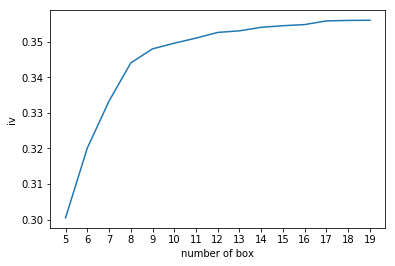

In [48]:
num_bins_ = num_bins.copy()
afterbins = get_and_plt_chi2(num_bins_,5)


In [49]:
afterbins

[(21.0, 61.0, 69610, 88566),
 (61.0, 64.0, 6968, 3191),
 (64.0, 68.0, 6623, 2279),
 (68.0, 74.0, 6753, 1921),
 (74.0, 107.0, 7737, 1360)]

In [51]:
get_woe(afterbins)

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,61.0,69610,88566,158176,0.811126,0.559921,0.712553,0.910077,-0.244676
1,61.0,64.0,6968,3191,10159,0.052095,0.314106,0.071327,0.032790,0.777158
2,64.0,68.0,6623,2279,8902,0.045649,0.256010,0.067795,0.023418,1.062976
3,68.0,74.0,6753,1921,8674,0.044480,0.221466,0.069126,0.019740,1.253305
4,74.0,107.0,7737,1360,9097,0.046649,0.149500,0.079199,0.013975,1.734694


In [60]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
   自动最优分箱函数，基于卡方检验的分箱
   参数：
   DF: 需要输入的数据
   X: 需要分箱的列名
   Y: 分箱数据对应的标签 Y 列名
   n: 保留分箱个数
   q: 初始分箱的个数
   graph: 是否要画出IV图像
   区间为前开后闭 (]
   """    
    
    DF = DF[[X,Y]].copy()
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue
            
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    IV = []
    axisx = []
    bins_df = pd.DataFrame()
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    if graph:    
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df


RevolvingUtilizationOfUnsecuredLines


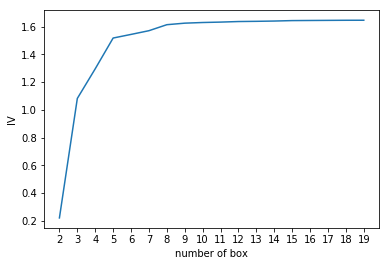

age


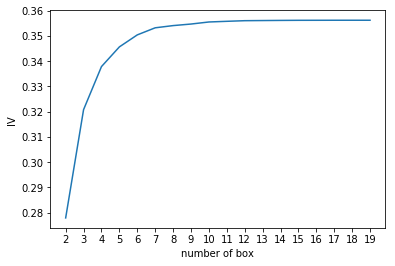

NumberOfTime30-59DaysPastDueNotWorse


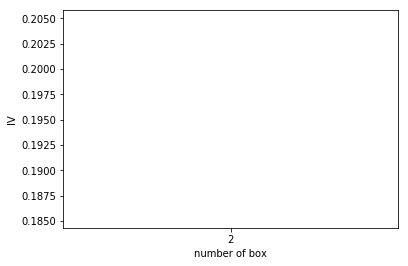

DebtRatio


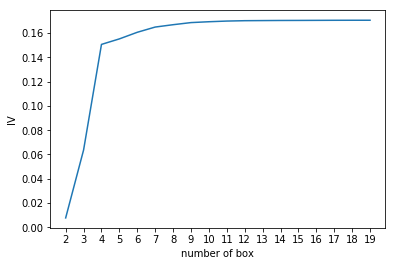

MonthlyIncome


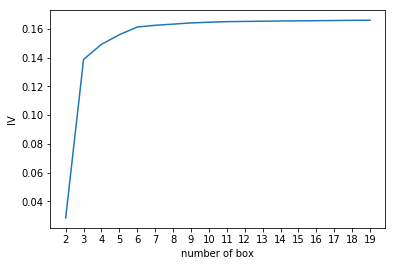

NumberOfOpenCreditLinesAndLoans


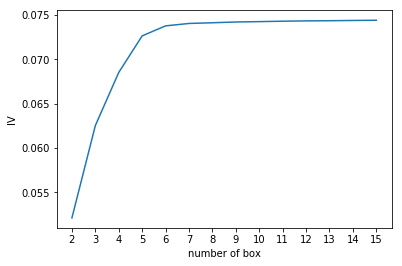

NumberOfTimes90DaysLate


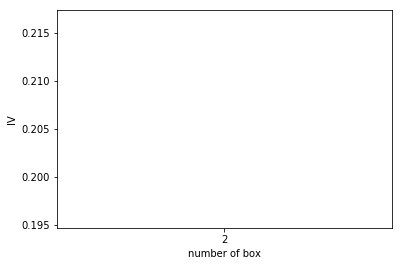

NumberRealEstateLoansOrLines


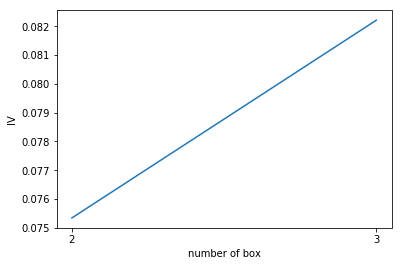

NumberOfTime60-89DaysPastDueNotWorse


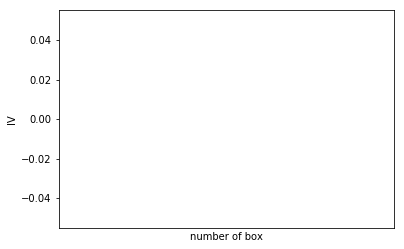

In [61]:
model_data.columns
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)


In [56]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                 "age":5,
                 "DebtRatio":4,
                 "MonthlyIncome":3,
                 "NumberOfOpenCreditLinesAndLoans":5}
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
             ,"NumberOfDependents":[0,1,2,3]}
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [58]:
bins_of_col = {}
# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09904372745676276,
  0.2983447284903334,
  0.4654404431557432,
  0.9833514732365123,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.01763789395,
  0.40157742601079316,
  1.4692109515489487,
  inf],
 'MonthlyIncome': [-inf, 0.1, 5597.6786135183065, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy


class CutBox(object):

    def __init__(self,DF,n=5,q=20,graph=True):
        self.DF = DF
        self.graph = graph

    def cut_and_merge_box(self,X,Y,q=20):
        '''
        :param X: 特征X
        :param Y: 标签Y
        :param q: 初始分箱个数
        :return: 分箱数据【（start，end，count_0,count_1）】
        '''
        df = self.DF[[X, Y]].copy()
        df["qcut"], bins = pd.qcut(df[X], retbins=True, q=q,duplicates="drop")
        coount_y0 = df.loc[df[Y] == 0].groupby(by="qcut").count()[Y]
        coount_y1 = df.loc[df[Y] == 1].groupby(by="qcut").count()[Y]
        num_bins = [*zip(bins, bins[1:], coount_y0, coount_y1)]

        for i in range(q):
            if 0 in num_bins[0][2:]:
                num_bins[0:2] = [(
                    num_bins[0][0],
                    num_bins[1][1],
                    num_bins[0][2] + num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
                continue
            for i in range(len(num_bins)):
                if 0 in num_bins[i][2:]:
                    num_bins[i - 1:i + 1] = [(
                        num_bins[i - 1][0],
                        num_bins[i][1],
                        num_bins[i - 1][2] + num_bins[i][2],
                        num_bins[i - 1][3] + num_bins[i][3])]
                    break
            else:
                break
        return num_bins

    @staticmethod
    def get_woe(num_bins):
        '''

        :param num_bins:分箱结果
        :return:woe矩阵 ，iv值
        '''
        columns = ["min", "max", "count_0", "count_1"]
        df = pd.DataFrame(num_bins, columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0 / df.count_0.sum()
        df["bad%"] = df.count_1 / df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return df,iv

    def chi2_check(self,num_bins,n=5):
        IV = []
        axisx = []
        bins_df = pd.DataFrame()
        while len(num_bins) > n:
            pvs = []
            for i in range(len(num_bins) - 1):
                x1 = num_bins[i][2:]
                x2 = num_bins[i + 1][2:]
                pv = scipy.stats.chi2_contingency([x1, x2])[1]
                pvs.append(pv)
            i = pvs.index(max(pvs))
            num_bins[i:i + 2] = [(
                num_bins[i][0],
                num_bins[i + 1][1],
                num_bins[i][2] + num_bins[i + 1][2],
                num_bins[i][3] + num_bins[i + 1][3])]
            bins_df = pd.DataFrame(self.get_woe(num_bins)[0])
            axisx.append(len(num_bins))
            IV.append(self.get_woe(bins_df)[1])
        return bins_df,axisx,IV


    def graph_plt(self,axisx,IV):
        if self.graph:
            plt.figure()
            plt.plot(axisx,IV)
            plt.xlabel("number of box")
            plt.ylabel("IV")
            plt.show()

    def cut_all(self,n=5,q=20):
        colums = self.DF.columns[1:]
        label = self.DF.columns[0]
        bins_df_all ={}
        for i in colums:
            print(i)
            num_bins = self.cut_and_merge_box(i,label,q=q)
            bins_df,axisx,IV = self.chi2_check(num_bins,n=n)
            self.graph_plt(axisx,IV)
            bins_df_all[i] = bins_df
        return bins_df_all

In [55]:
cb = CutBox(model_data)

RevolvingUtilizationOfUnsecuredLines


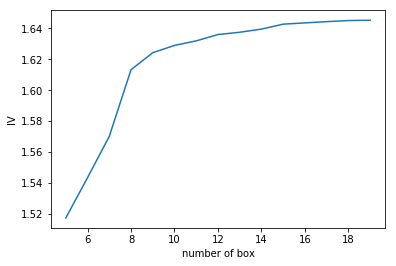

age


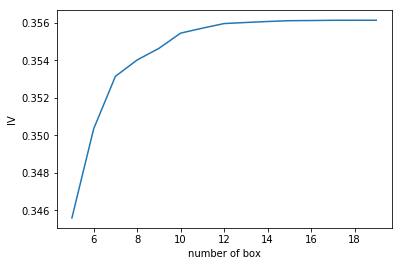

NumberOfTime30-59DaysPastDueNotWorse


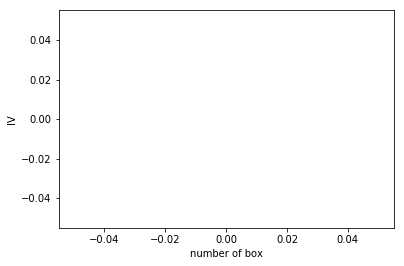

DebtRatio


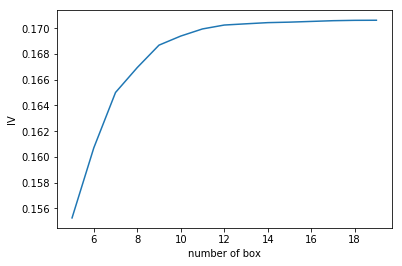

MonthlyIncome


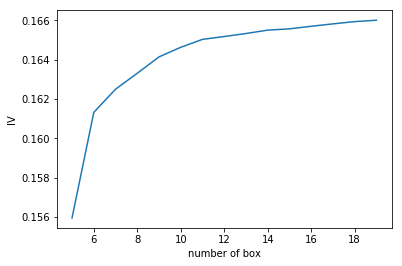

NumberOfOpenCreditLinesAndLoans


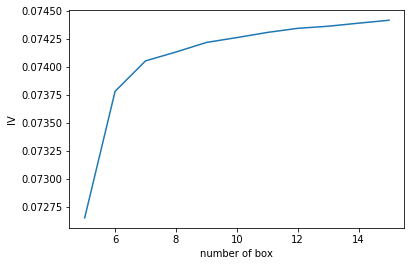

NumberOfTimes90DaysLate


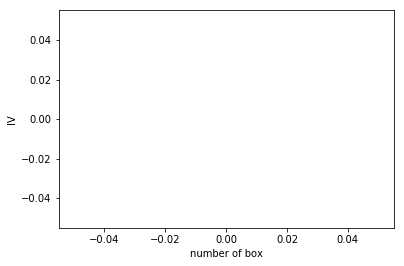

NumberRealEstateLoansOrLines


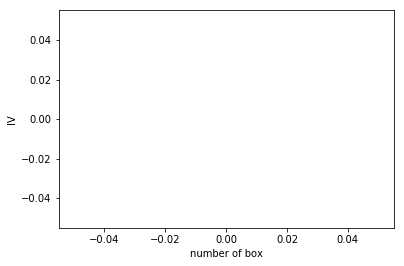

NumberOfTime60-89DaysPastDueNotWorse


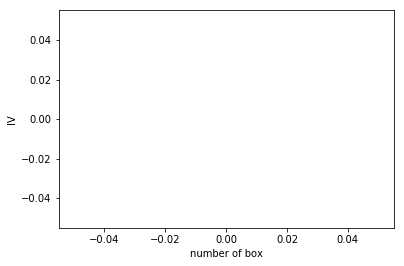

NumberOfDependents


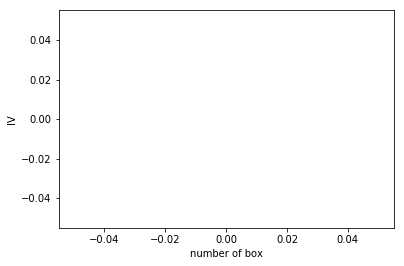

In [56]:
cb_all = cb.cut_all()

In [57]:
for k,v in cb_all.items():
    if v.empty:
        print(k)

NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [64]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":8,
                 "age":7,
                 "DebtRatio":9,
                 "MonthlyIncome":6,
                 "NumberOfOpenCreditLinesAndLoans":6}
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
             ,"NumberOfDependents":[0,1,2,3]}
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [65]:
bins_of_col = {}

for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
#合并手动分箱数据    
bins_of_col.update(hand_bins)
bins_of_col


{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.03393496085000001,
  0.09904372745676276,
  0.2983447284903334,
  0.4654404431557432,
  0.7233071867799403,
  0.9833514732365123,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 46.0, 54.0, 61.0, 64.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.01763789395,
  0.283105023,
  0.40157742601079316,
  0.5729547411670949,
  1.4692109515489487,
  136.3683896742557,
  994.0,
  2357.330037282242,
  inf],
 'MonthlyIncome': [-inf,
  0.1,
  4.931404619684331,
  3350.0,
  5597.6786135183065,
  7727.011667803558,
  inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 2.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [68]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0339]     2.606535
 (0.0339, 0.099]    1.766195
 (0.099, 0.298]     0.672946
 (0.298, 0.465]    -0.129842
 (0.465, 0.723]    -0.772624
 (0.723, 0.983]    -1.329876
 (0.983, 1.0]      -0.463917
 (1.0, inf]        -2.053522
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.517994
 (36.0, 46.0]   -0.355404
 (46.0, 54.0]   -0.199774
 (54.0, 61.0]    0.250387
 (61.0, 64.0]    0.777158
 (64.0, 74.0]    1.154542
 (74.0, inf]     1.734694
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0176]      1.538561
 (0.0176, 0.283]     0.080620
 (0.283, 0.402]     -0.058550
 (0.402, 0.573]     -0.269654
 (0.573, 1.469]     -0.509432
 (1.469, 136.368]    0.260253
 (136.368, 994.0]   -0.207345
 (994.0, 2357.33]    0.461503
 (2357.33, inf]      0.197229
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.1]             1.392702
 (0.1, 4.931]            0.057906
 (4.931, 3350.0]        -0.402559
 (3350.0, 5597.679]     -0.195209
 (5597.679, 7727.012]    0.072164
 

In [70]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中

In [85]:
pd.cut(model_data["age"].head(),bins_of_col["age"]).apply(woeall['age'])

0   -0.199774
1    0.777158
2   -0.355404
3    1.154542
4   -0.199774
Name: age, dtype: category
Categories (7, float64): [-0.517994 < -0.355404 < -0.199774 < 0.250387 < 0.777158 < 1.154542 < 1.734694]

In [86]:
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])

In [87]:
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
#这就是我们的建模数据了
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [89]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]

from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)


0.7727098688618742

0.01


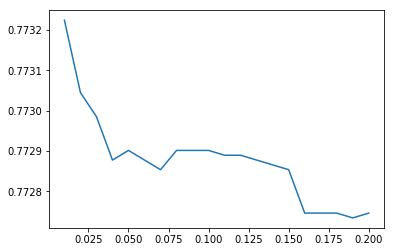

In [105]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
score = []
for i in c_2:
    lr = LR(solver='liblinear',C=0.01).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
print(c_2[score.index(max(score))])
plt.figure()
plt.plot(c_2,score)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

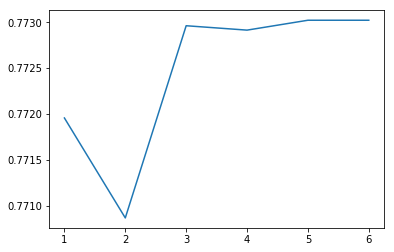

In [106]:
score = []
for i in [1,2,3,4,5,6]:
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

In [111]:
lr = LR(solver='liblinear',C=0.01,max_iter=5).fit(X,y)
lr.score(vali_X,vali_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7732243706327175

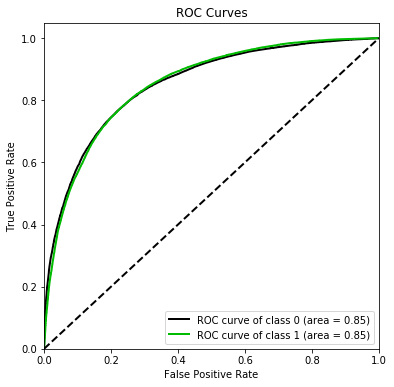

In [112]:
import scikitplot as skplt
#%%cmd
#pip install scikit-plot
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                       plot_micro=False,figsize=(6,6),
                       plot_macro=False)


In [119]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B,A
model_woe.head(5)

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.199774,2.606535,0.080620,-0.195209,-0.052017,0.348424,0.236077,-0.391430,0.124861,0.628366,0
1,0.777158,0.672946,0.080620,-0.402559,-0.052017,0.348424,0.236077,-0.391430,0.124861,0.628366,0
2,-0.355404,-2.053522,-0.269654,-0.195209,-0.052017,-0.850851,-1.748944,-0.391430,-1.765641,-0.477005,1
3,1.154542,1.766195,-0.269654,-0.195209,0.124562,0.348424,0.236077,0.616432,0.124861,0.628366,0
4,-0.199774,-0.772624,-0.269654,0.351743,0.124562,0.348424,0.236077,0.616432,0.124861,-0.582664,1


In [117]:
lr.coef_

array([[-0.25906846, -0.75166055, -0.69795087, -0.36537282, -0.25808419,
        -0.52754423, -0.557884  , -0.88735091, -0.28241401, -0.79348579]])

In [116]:
base_score = A - B*lr.intercept_
base_score
score_age = woeall["age"] * (-B*lr.coef_[0][0])
score_age

cut
(-inf, 36.0]    -3.872078
(36.0, 46.0]    -2.656696
(46.0, 54.0]    -1.493341
(54.0, 61.0]     1.871674
(61.0, 64.0]     5.809363
(64.0, 74.0]     8.630356
(74.0, inf]     12.967070
dtype: float64

In [122]:
file = r"G:\机器学习资料\菜菜的skleran\ranking_card\ScoreData.csv"
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")


In [123]:
[*enumerate(X.columns)]

[(0, 'age'),
 (1, 'RevolvingUtilizationOfUnsecuredLines'),
 (2, 'DebtRatio'),
 (3, 'MonthlyIncome'),
 (4, 'NumberOfOpenCreditLinesAndLoans'),
 (5, 'NumberOfTime30-59DaysPastDueNotWorse'),
 (6, 'NumberOfTimes90DaysLate'),
 (7, 'NumberRealEstateLoansOrLines'),
 (8, 'NumberOfTime60-89DaysPastDueNotWorse'),
 (9, 'NumberOfDependents')]